Part 1

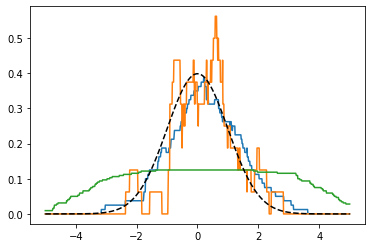

In [30]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

def gen_gaussian(x, mu, sig):
  return 1 / np.sqrt(2 * np.pi) / sig * np.exp(-((x - mu) / sig) ** 2 / 2)

mu = 0
sigma = 1
X = np.random.normal(loc=mu, scale=sigma, size = [40,1])

kde = KernelDensity(kernel='tophat', bandwidth=1).fit(X)

x_sample = np.linspace(-5, 5, 1000)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample), -1)))

fig, ax = plt.subplots()
plt.plot(x_sample,p)

kde = KernelDensity(kernel='tophat', bandwidth=0.2).fit(X)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample), -1)))
plt.plot(x_sample,p)

kde = KernelDensity(kernel='tophat', bandwidth=4.0).fit(X)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample), -1)))
plt.plot(x_sample,p)

p_true =  gen_gaussian(x = x_sample, mu = mu, sig = sigma)
plt.plot(x_sample,p_true,'k--')

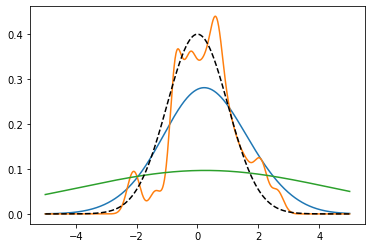

In [31]:
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(X)

x_sample = np.linspace(-5, 5, 1000)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample), -1)))

fig, ax = plt.subplots()
plt.plot(x_sample,p)

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample), -1)))
plt.plot(x_sample,p)

kde = KernelDensity(kernel='gaussian', bandwidth=4.0).fit(X)
p = np.exp(kde.score_samples(x_sample.reshape(len(x_sample), -1)))
plt.plot(x_sample,p)

p_true =  gen_gaussian(x = x_sample, mu = mu, sig = sigma)
plt.plot(x_sample,p_true,'k--')

Part 2

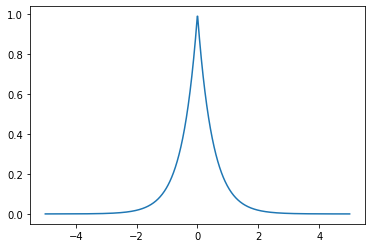

In [32]:
X_vis = np.array([[0]])
kde = KernelDensity(kernel='exponential', bandwidth=0.5).fit(X_vis)
p_vis = np.exp(kde.score_samples(x_sample.reshape(len(x_sample), -1)))
plt.plot(x_sample,p_vis)

Part 3

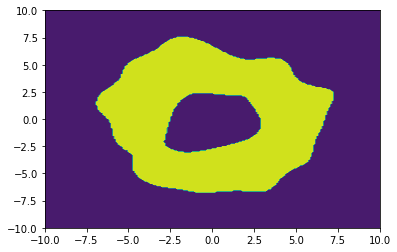

In [33]:
def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y

def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

X, y = gen_circular_distribution(200) 
X1 = X[y == 0, :] 
X2 = X[y == 1, :]

b = 1
#b = 0.2
kde1 = KernelDensity(kernel='gaussian', bandwidth=b).fit(X1)
kde2 = KernelDensity(kernel='gaussian', bandwidth=b).fit(X2)

Xgrid,x1line,x2line = gen_sample_grid(200,200,10)

p1_grid = np.exp(kde1.score_samples(Xgrid)).reshape(200,200)
p2_grid = np.exp(kde2.score_samples(Xgrid)).reshape(200,200)

state_of_nature = np.zeros([200,200])
state_of_nature[p1_grid < p2_grid] = 1

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,state_of_nature)

Part 4

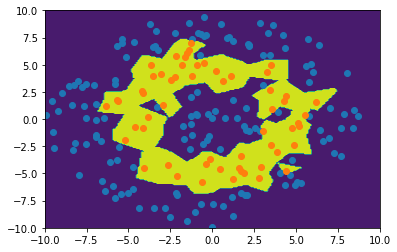

In [34]:
from sklearn.neighbors import KNeighborsClassifier

near = 1
neigh = KNeighborsClassifier(n_neighbors=near) 
neigh.fit(X, y)

son = neigh.predict(Xgrid).reshape(200,200)
fig, ax = plt.subplots()
plt.contourf(x1line,x2line,son)
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

Part 5

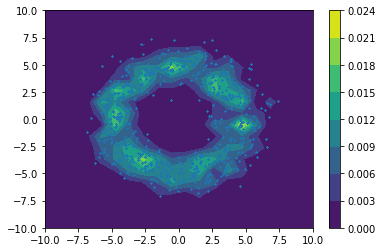

In [35]:
nx = 20
#nx = 40
#nx = 10
r = 10
gridDim = np.linspace(-r, r, nx)

dx = gridDim[1] - gridDim[0]
minx = np.min(gridDim)

X, y = gen_circular_distribution(2000)

Xuse = X[y == 1, :]

Xgrid = (np.round((Xuse[:, 0] - minx) / dx * 0.99)).astype('int')
Ygrid = (np.round((Xuse[:, 1] - minx) / dx * 0.99)).astype('int')
density = np.zeros([nx, nx])

for i in range(len(Xgrid)):
    density[Xgrid[i], Ygrid[i]] += 1

totDen = np.sum(density[:])
density /= totDen * dx * dx

fig, ax = plt.subplots()
plt.contourf(gridDim, gridDim, density.T)

ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', s=2)
plt.colorbar()
plt.xlim(-r, r)
plt.ylim(-r, r)
plt.show()
